<a href="https://colab.research.google.com/github/guilhermebleidao/pdi-2022-2/blob/main/Tarefa1/Tarefa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando arquivos e bibliotecas

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
import os

!wget --no-check-certificate \
    "https://github.com/guilhermebleidao/pdi-2022-2/archive/refs/heads/main.zip" \
    -O "/tmp/pdi-2022-2.zip"

zip_ref = zipfile.ZipFile('/tmp/pdi-2022-2.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2022-09-06 18:56:13--  https://github.com/guilhermebleidao/pdi-2022-2/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/guilhermebleidao/pdi-2022-2/zip/refs/heads/main [following]
--2022-09-06 18:56:13--  https://codeload.github.com/guilhermebleidao/pdi-2022-2/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9258948 (8.8M) [application/zip]
Saving to: ‘/tmp/pdi-2022-2.zip’

/tmp/pdi-2022-2.zip 100%[===================>]   8.83M  17.9MB/s    in 0.5s    

2022-09-06 18:56:14 (17.9 MB/s) - ‘/tmp/pdi-2022-2.zip’ saved [9258948/9258948]



Recuperação de um dos heróis e separação das 3 camadas da imagem (red, green e blue)

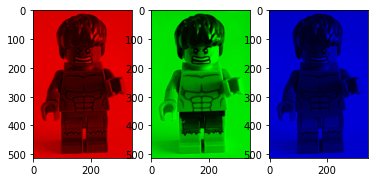

In [154]:
hulk = plt.imread('/tmp/pdi-2022-2-main/Tarefa1/Base1/imagens-modelo/Hulk.png')

hulkRed = hulk.copy()
hulkRed[:,:,1] = 0
hulkRed[:,:,2] = 0

hulkGreen = hulk.copy()
hulkGreen[:,:,0] = 0
hulkGreen[:,:,2] = 0

hulkBlue = hulk.copy()
hulkBlue[:,:,0] = 0
hulkBlue[:,:,1] = 0

plt.subplot(1, 3, 1)
plt.imshow(hulkRed)
plt.subplot(1, 3, 2)
plt.imshow(hulkGreen)
plt.subplot(1, 3, 3)
plt.imshow(hulkBlue)
plt.show()

Funções

In [155]:
def separarCamadas(imagem):
  imagemRed = imagem.copy()
  imagemGreen = imagem.copy()
  imagemBlue = imagem.copy()

  imagemRed[:,:,1] = 0
  imagemRed[:,:,2] = 0
  imagemGreen[:,:,0] = 0
  imagemGreen[:,:,2] = 0
  imagemBlue[:,:,0] = 0
  imagemBlue[:,:,1] = 0
  
  return imagemRed, imagemGreen, imagemBlue

def gerarHistograma(imagem):
  histogramaRed = cv2.calcHist((imagem['red']*256).round(), [0], None, [256], [0, 256])
  histogramaGreen = cv2.calcHist((imagem['green']*256).round(), [1], None, [256], [0, 256])
  histogramaBlue = cv2.calcHist((imagem['blue']*256).round(), [2], None, [256], [0, 256])

  histogramaRed = cv2.normalize(histogramaRed, histogramaRed).flatten()
  histogramaGreen = cv2.normalize(histogramaGreen, histogramaGreen).flatten()
  histogramaBlue = cv2.normalize(histogramaBlue, histogramaBlue).flatten()

  return histogramaRed, histogramaGreen, histogramaBlue

def retornarIntersecao(histograma1, histograma2):
  minima = np.minimum(histograma1, histograma2)
  intersecao = np.true_divide(np.sum(minima), np.sum(histograma2))
  return intersecao

def plotarResultado(imagem, resultado):
  plt.subplots_adjust(wspace=0.5)
  plt.subplot(1, 2, 1)
  plt.imshow(imagem)
  plt.subplot(1, 2, 2)
  plt.barh(list(resultado.keys()), list(resultado.values()), 0.5, color='red')
  plt.xlabel('Probabilidade')
  plt.show()

Recuperando as imagens-modelo e imagens-teste

In [156]:
herois = {'America', 'Batman', 'Ferro', 'Flash', 'Hulk', 'Maravilha', 'Super', 'Wolverine'}
desconhecidos = {'QUEM1', 'QUEM2', 'QUEM3', 'QUEM4', 'QUEM5'}
imagens_modelo = {}
imagens_teste = {}

for heroi in herois:
  imagem = plt.imread('/tmp/pdi-2022-2-main/Tarefa1/Base1/imagens-modelo/{nome}.png'.format(nome = heroi))
  red, green, blue = separarCamadas(imagem)

  imagens_modelo[heroi] = {'original': imagem, 'red': red, 'green': green, 'blue': blue}

for desconhecido in desconhecidos:
  imagem = plt.imread('/tmp/pdi-2022-2-main/Tarefa1/Base1/imagens-teste/{nome}.png'.format(nome = desconhecido))
  red, green, blue = separarCamadas(imagem)

  imagens_teste[desconhecido] = {'original': imagem, 'red': red, 'green': green, 'blue': blue}

Gerando histogramas das imagens

In [157]:
histogramas_imagens_modelo = {}
histogramas_imagens_teste = {}

for heroi in imagens_modelo:
  histogramaRed, histogramaGreen, histogramaBlue = gerarHistograma(imagens_modelo[heroi])
  histogramas_imagens_modelo[heroi] = {'red': histogramaRed, 'green': histogramaGreen, 'blue': histogramaBlue}

for desconhecido in imagens_teste:
  histogramaRed, histogramaGreen, histogramaBlue = gerarHistograma(imagens_teste[desconhecido])
  histogramas_imagens_teste[desconhecido] = {'red': histogramaRed, 'green': histogramaGreen, 'blue': histogramaBlue}

Comparando os histogramas

In [158]:
resultados = {}

for desconhecido in histogramas_imagens_teste:
  resultados[desconhecido] = {}

  for heroi in histogramas_imagens_modelo:
    intersecaoRed = retornarIntersecao(histogramas_imagens_teste[desconhecido]['red'], histogramas_imagens_modelo[heroi]['red'])
    intersecaoGreen = retornarIntersecao(histogramas_imagens_teste[desconhecido]['green'], histogramas_imagens_modelo[heroi]['green'])
    intersecaoBlue = retornarIntersecao(histogramas_imagens_teste[desconhecido]['blue'], histogramas_imagens_modelo[heroi]['blue'])
    compatibilidade = intersecaoRed + intersecaoGreen + intersecaoBlue
    resultados[desconhecido][heroi] = compatibilidade / 3

Plotando gráficos


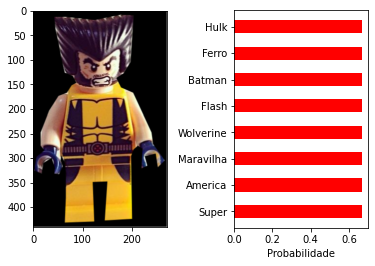

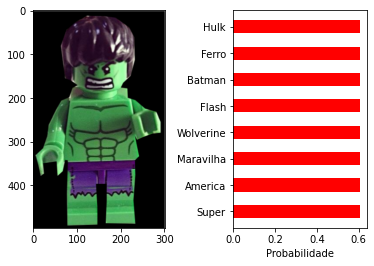

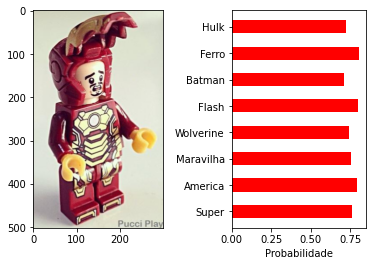

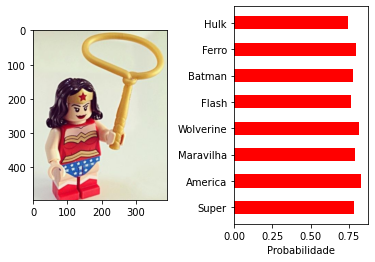

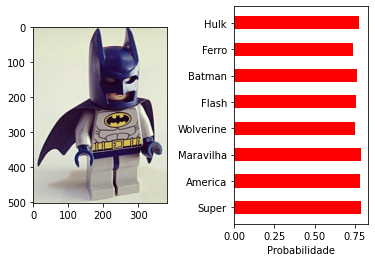

In [159]:
for desconhecido in resultados:
  plotarResultado(imagens_teste[desconhecido]['original'], resultados[desconhecido])